In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import LSTM, Dense

<AxesSubplot:xlabel='Date'>

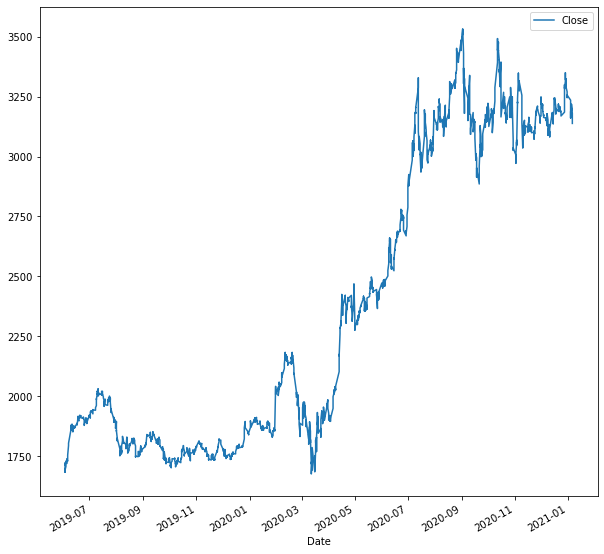

In [3]:
data=yf.download('AMZN',start='2019-06-01', interval='1h',  end='2021-01-07',progress=False)[['Close']]
data.head()
 
data.plot(figsize=(10,10))

In [5]:
cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*0.90)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

2520 10
281 10
2520
281


In [6]:
# Build the model
model = Sequential()
model.add(LSTM(256, input_shape=(lb, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [7]:
# Reshape data for (Sample,Timestep,Features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [8]:
# Fit model with history to check for overfitting
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), shuffle=False)
model.summary()

Epoch 1/300
79/79 [==============================] - 2s 28ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0016 - val_loss: 3.3558e-04
Epoch 3/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0013 - val_loss: 2.9037e-04
Epoch 4/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0014 - val_loss: 9.3817e-04
Epoch 5/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 6/300
79/79 [==============================] - 2s 24ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 7/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 8/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0013 - val_

Epoch 77/300
79/79 [==============================] - 2s 23ms/step - loss: 1.7098e-04 - val_loss: 1.5276e-04
Epoch 78/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6989e-04 - val_loss: 1.5160e-04
Epoch 79/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6901e-04 - val_loss: 1.5055e-04
Epoch 80/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6821e-04 - val_loss: 1.4959e-04
Epoch 81/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6761e-04 - val_loss: 1.4843e-04
Epoch 82/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6689e-04 - val_loss: 1.4923e-04
Epoch 83/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6497e-04 - val_loss: 1.4863e-04
Epoch 84/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6392e-04 - val_loss: 1.4421e-04
Epoch 85/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6558e-04 - val_loss: 1.4103e-04
Epoch 86/300
79/79 

79/79 [==============================] - 2s 25ms/step - loss: 1.3233e-04 - val_loss: 9.3380e-05
Epoch 226/300
79/79 [==============================] - 2s 23ms/step - loss: 1.3426e-04 - val_loss: 9.3489e-05
Epoch 227/300
79/79 [==============================] - 2s 24ms/step - loss: 1.3298e-04 - val_loss: 9.3512e-05
Epoch 228/300
79/79 [==============================] - 2s 23ms/step - loss: 1.3411e-04 - val_loss: 9.4012e-05
Epoch 229/300
79/79 [==============================] - 2s 24ms/step - loss: 1.3374e-04 - val_loss: 9.4207e-05
Epoch 230/300
79/79 [==============================] - 3s 32ms/step - loss: 1.3479e-04 - val_loss: 9.5457e-05
Epoch 231/300
79/79 [==============================] - 2s 24ms/step - loss: 1.3502e-04 - val_loss: 9.5339e-05
Epoch 232/300
79/79 [==============================] - 2s 25ms/step - loss: 1.3561e-04 - val_loss: 9.6685e-05
Epoch 233/300
79/79 [==============================] - 2s 24ms/step - loss: 1.3705e-04 - val_loss: 9.7724e-05
Epoch 234/300
79/79 [===

In [9]:
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Train Dataset')

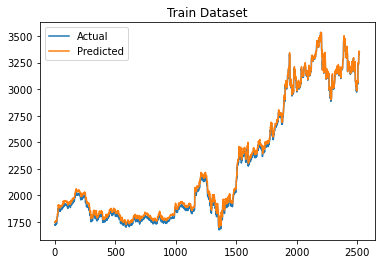

In [10]:
Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1, 1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

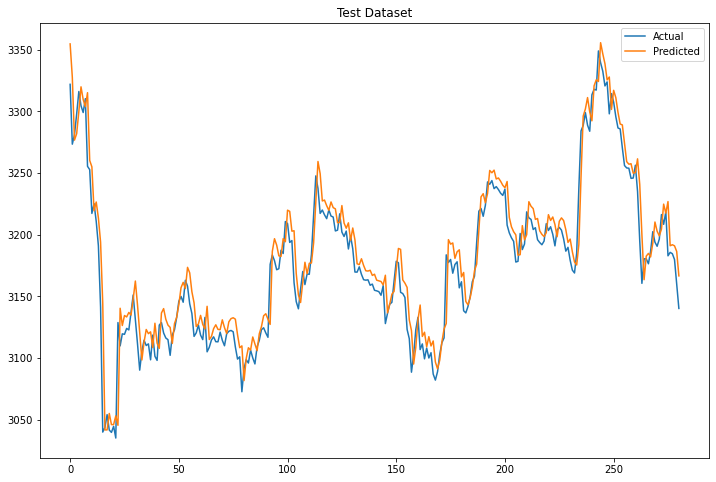

In [11]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

In [12]:
# Predict N steps
def processData(data, lb):
    X = []
    for i in range(len(data) - lb - 1):
        X.append(data[i:(i + lb), 0])
    return np.array(X)

In [ ]:
# create the x_test_dummy
cl2 = cl.copy()
pred = []
for i in range(X_test.shape[0]):
    cl2[int(X.shape[0] * 0.90) + i + lb] = model.predict(X_test)[i]
    pred.extend(model.predict(X_test)[i])
    X = processData(cl2, lb)
    X_train, X_test = X[:int(X.shape[0] * 0.90)], X[int(X.shape[0] * 0.90):]
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

prediction = scl.inverse_transform(np.array(pred).reshape(-1, 1))
plt.figure(figsize=(12, 8))
plt.plot(scl.inverse_transform(y_test.reshape(-1, 1)), label="Actual")
plt.plot(prediction, label="Predicted")

plt.title("Test Dataset 250 Obs Ahead")